In [3]:
from my_library import *

In [4]:
customers = pd.read_csv('../Data_e-commerce/olist_customers_dataset.csv')
geolocation = pd.read_csv('../Data_e-commerce/olist_geolocation_dataset.csv')
order_items = pd.read_csv('../Data_e-commerce/olist_order_items_dataset.csv')
order_payments = pd.read_csv('../Data_e-commerce/olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('../Data_e-commerce/olist_order_reviews_dataset.csv')
orders = pd.read_csv('../Data_e-commerce/olist_orders_dataset.csv')
products = pd.read_csv('../Data_e-commerce/olist_products_dataset.csv')
sellers = pd.read_csv('../Data_e-commerce/olist_sellers_dataset.csv')

# product_category 이름 English로 번역
name_translation = pd.read_csv('../Data_e-commerce/product_category_name_translation.csv')

## Summary

- Data 결측치 확인
- column별 특징 확인 및 시각화

### Customers

- 모든 column 결측치 X

In [40]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


customer city

Text(0.5, 1.0, 'customer city TOP10')

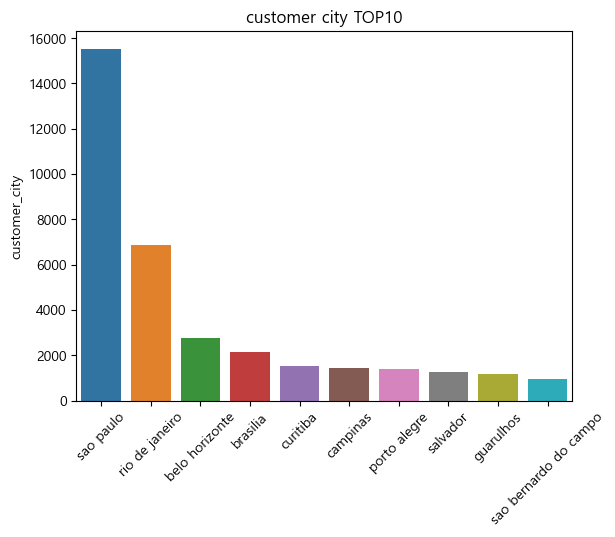

In [48]:
customers.customer_city.value_counts()[:10].to_frame()
sns.barplot(data=customers.customer_city.value_counts()[:10].to_frame(), x=customers.customer_city.value_counts()[:10].to_frame().index, y='customer_city')
plt.xticks(rotation = 45)
plt.title('customer city TOP10')

customer state

Text(0.5, 1.0, 'customer state TOP10')

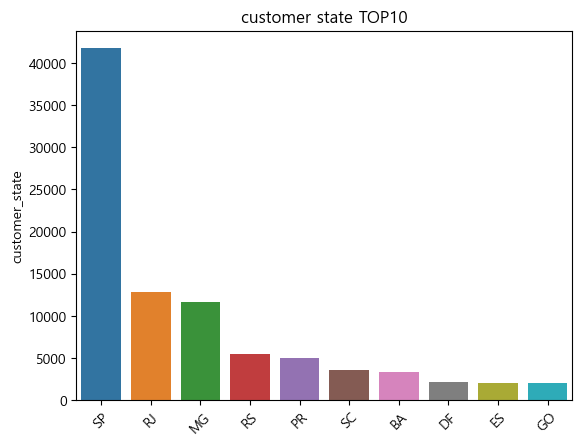

In [49]:
customers.customer_state.value_counts()[:10].to_frame()
sns.barplot(data=customers.customer_state.value_counts()[:10].to_frame(), x=customers.customer_state.value_counts()[:10].to_frame().index, y='customer_state')
plt.xticks(rotation = 45)
plt.title('customer state TOP10')

customer_id, customer_unique_id

In [55]:
# 각 주문은 고유 customer id가짐 / 재구매한 고객의 수
customers.customer_id.nunique() - customers.customer_unique_id.nunique()

3345

customer_zip_code_prefix

https://www.mapsofworld.com/postal-codes/country-brazil.html

In [114]:
# zip_code : 우편번호

customers.customer_zip_code_prefix = customers.customer_zip_code_prefix.astype(str)
cond1 = customers.customer_zip_code_prefix.apply(len)
cond1[cond1.values < 5].shape[0]
cond1[cond1.values < 5].value_counts()

# 앞의 5숫자를 가져온 것인데 5글자 미만인 경우가 23995, 모두 4글자임 -> 마지막 숫자가 0인 경우로 판단 
# 4글자 -> 5글자로 데이터 전처리 필요!

4    23995
Name: customer_zip_code_prefix, dtype: int64

### Geolocation

- 모든 column 결측치 X

In [86]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


geolocation_city

In [94]:
geolocation.geolocation_city.value_counts()[:10].to_frame()

,geolocation_city
sao paulo,135800
rio de janeiro,62151
belo horizonte,27805
são paulo,24918
curitiba,16593
porto alegre,13521
salvador,11865
guarulhos,11340
brasilia,10470
sao bernardo do campo,8112


Text(0.5, 1.0, 'geolocation_city TOP10')

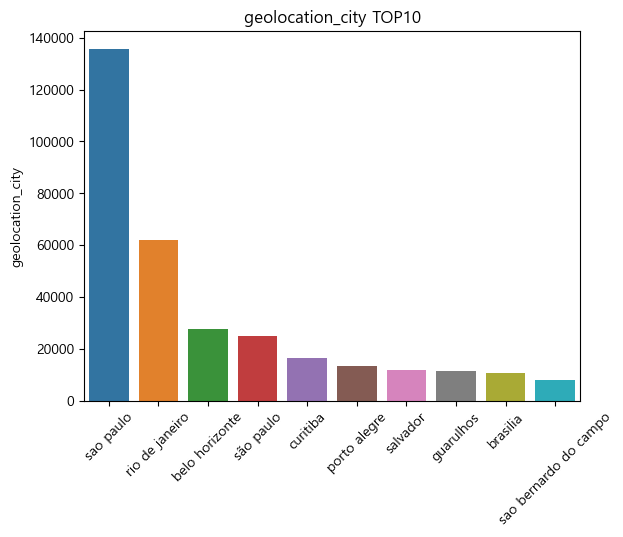

In [97]:
geolocation.geolocation_city.value_counts()[:10].to_frame()
sns.barplot(data=geolocation.geolocation_city.value_counts()[:10].to_frame(), x=geolocation.geolocation_city.value_counts()[:10].to_frame().index, y='geolocation_city')
plt.xticks(rotation = 45)
plt.title('geolocation_city TOP10')

geolocation_state

Text(0.5, 1.0, 'geolocation_state TOP10')

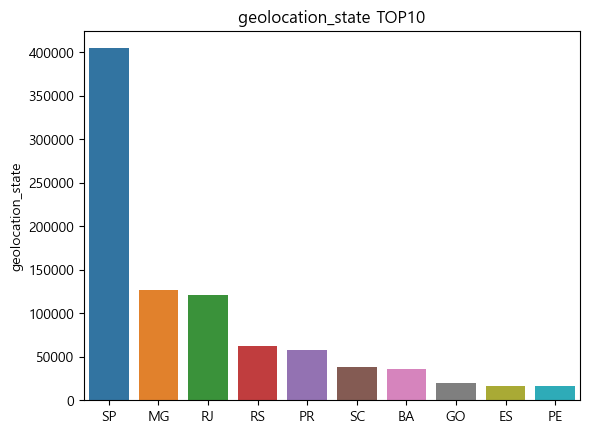

In [27]:
geolocation.geolocation_state.value_counts()[:10].to_frame()
sns.barplot(data=geolocation.geolocation_state.value_counts()[:10].to_frame(), x=geolocation.geolocation_state.value_counts()[:10].to_frame().index, y='geolocation_state')
plt.title('geolocation_state TOP10')

geolocation_lat, geolocation_lng : 위도, 경도

<AxesSubplot: xlabel='geolocation_lng', ylabel='geolocation_lat'>

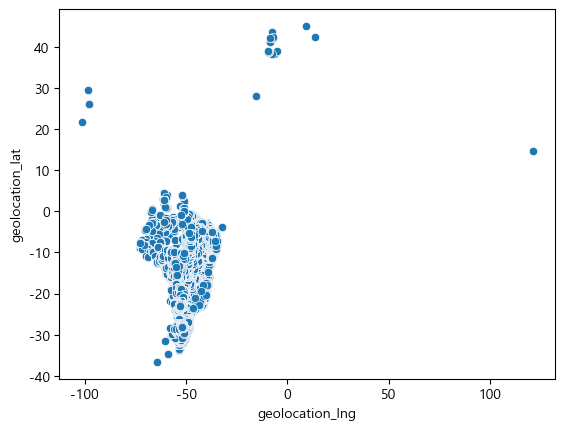

In [110]:
# latitude, longitude 확인 
sns.scatterplot(data=geolocation, x='geolocation_lng', y='geolocation_lat')

geolocation_zip_code_prefix

In [115]:
# zip_code : 우편번호

geolocation.geolocation_zip_code_prefix = geolocation.geolocation_zip_code_prefix.astype(str)
cond1 = geolocation.geolocation_zip_code_prefix.apply(len)
cond1[cond1.values < 5].shape[0]
cond1[cond1.values < 5].value_counts()

# 앞의 5숫자를 가져온 것인데 5글자 미만인 경우가 245733, 모두 4글자임 -> 마지막 숫자가 0인 경우로 판단 
# 4글자 -> 5글자로 데이터 전처리 필요!

4    245733
Name: geolocation_zip_code_prefix, dtype: int64

### Order_item

- 모든 column 결측치 X

In [117]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


order_id, order_item_id

In [119]:
order_items.order_id.nunique()

98666

Text(0.5, 1.0, 'order_item_id TOP10')

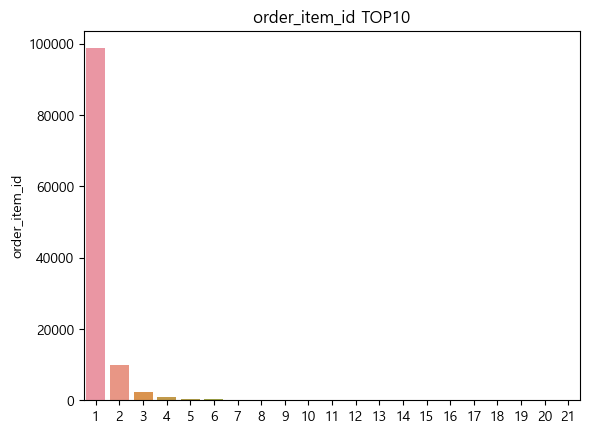

In [130]:
sns.barplot(data= order_items.order_item_id.value_counts().to_frame(), x=order_items.order_item_id.value_counts().to_frame().index, y='order_item_id')
plt.title('order_item_id TOP10')

In [121]:
order_items.order_item_id.nunique()

21

product_id

In [12]:
# products.product_id = order_items.product_id
print(products.product_id.nunique())
print(order_items.product_id.nunique())

32951
32951


seller_id

In [16]:
# order_items.seller_id = sellers.seller_id
print(order_items.seller_id.nunique())
print(sellers.seller_id.nunique())

3095
3095


shipping_limit_date

In [17]:
order_items.shipping_limit_date 

0         2017-09-19 09:45:35
1         2017-05-03 11:05:13
2         2018-01-18 14:48:30
3         2018-08-15 10:10:18
4         2017-02-13 13:57:51
                 ...         
112645    2018-05-02 04:11:01
112646    2018-07-20 04:31:48
112647    2017-10-30 17:14:25
112648    2017-08-21 00:04:32
112649    2018-06-12 17:10:13
Name: shipping_limit_date, Length: 112650, dtype: object

In [18]:
order_items.shipping_limit_date.sort_values()

101394    2016-09-19 00:15:34
84389     2016-09-19 23:11:33
84390     2016-09-19 23:11:33
84391     2016-09-19 23:11:33
90368     2016-10-08 10:34:01
                 ...         
26104     2018-09-18 21:10:15
68516     2020-02-03 20:23:22
8643      2020-02-05 03:30:51
85730     2020-04-09 22:35:08
85729     2020-04-09 22:35:08
Name: shipping_limit_date, Length: 112650, dtype: object

price

In [33]:
# 브라질 돈 : 헤알 (1헤알 = 247.68원 (2022.11.11 기준))

order_items.price.describe()

count    112650.000000
mean        120.653739
std         183.633928
min           0.850000
25%          39.900000
50%          74.990000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

<AxesSubplot: >

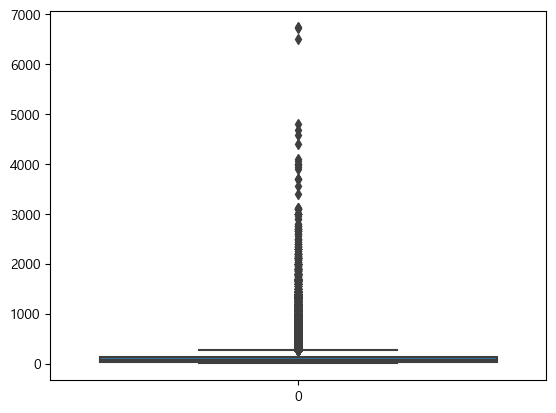

In [44]:
sns.boxplot(order_items.price)

<AxesSubplot: xlabel='price', ylabel='Count'>

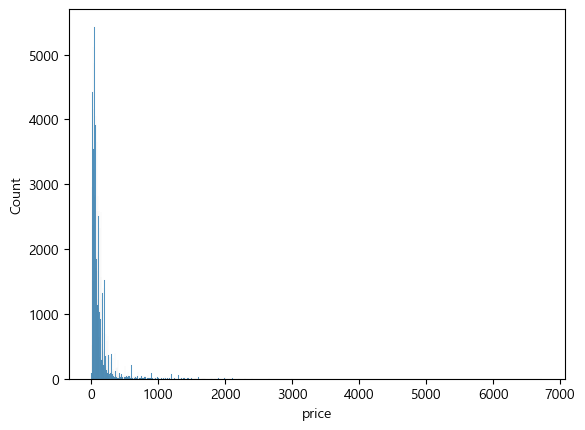

In [29]:
sns.histplot(order_items.price)

freight_value

In [30]:
order_items.freight_value.describe()

count    112650.000000
mean         19.990320
std          15.806405
min           0.000000
25%          13.080000
50%          16.260000
75%          21.150000
max         409.680000
Name: freight_value, dtype: float64

<AxesSubplot: >

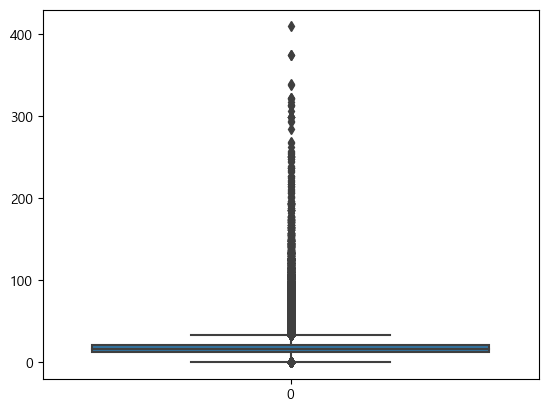

In [45]:
sns.boxplot(order_items.freight_value)

<AxesSubplot: xlabel='freight_value', ylabel='Count'>

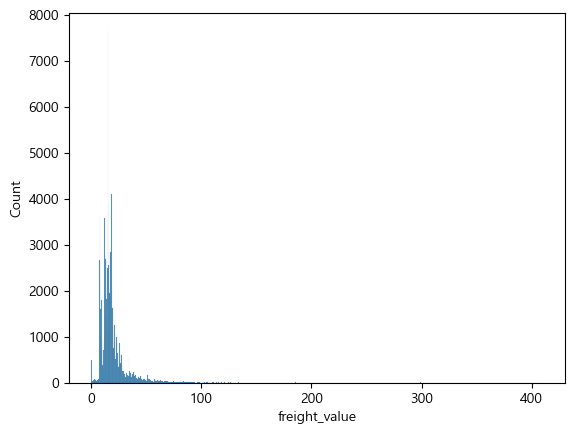

In [30]:
sns.histplot(order_items.freight_value)

### order_payments

- 모든 column 결측치 X

In [34]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [37]:
order_payments.nunique()

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

payment_sequential

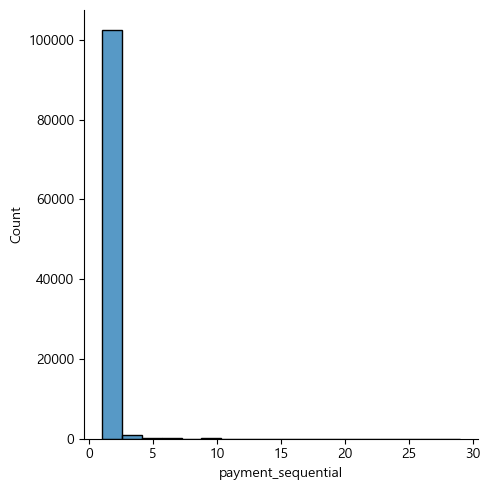

In [39]:
# 대부분 1개의 결제수단을 활용

sns.displot(order_payments['payment_sequential'])

payment_type

(3, 5)

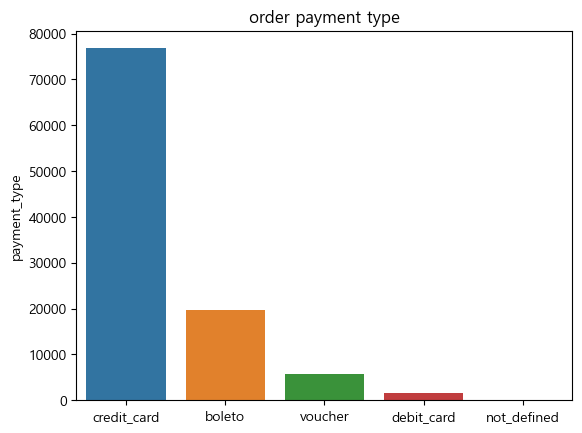

In [19]:
sns.barplot(data=order_payments.payment_type.value_counts().to_frame(), x=order_payments.payment_type.value_counts().to_frame().index, y='payment_type')
plt.title('order payment type')

# credit_card : 신용 카드
# boleto : 브라질 은행 연맹(FEBRAB)에 의해 규제되는 브라질의 결제 수단 / 브라질에서 인기 있는 현금 결제 수단으로 바코드, 결제 내역, 고객 정보가 포함된 인쇄 또는 가상 바우처
# voucher : 특정한 금전적 가치가 있고, 특정한 이유나 특정한 상품에 대해서만 소비할 수 있는 교환 거래 채권 중 하나
# debit_card : 직불 카드
# not_defined : 정의되어 있지 않는 결제 수단 / 거래 건수는 3건
order_payments[order_payments.payment_type == 'not_defined'].shape

Boleto 이미지
<img src="Boleto.png"/>

payment_installments

<AxesSubplot: xlabel='payment_installments', ylabel='Count'>

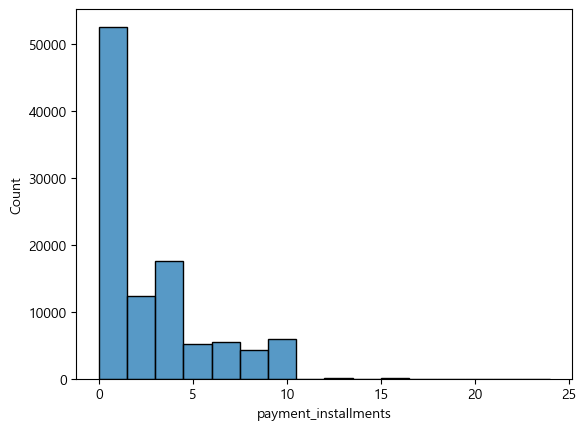

In [20]:
# 할부 개월 수 

sns.histplot(order_payments['payment_installments'], binwidth=1.5)

payment_value

In [4]:
order_payments.payment_value.describe()

count    103886.000000
mean        154.100380
std         217.494064
min           0.000000
25%          56.790000
50%         100.000000
75%         171.837500
max       13664.080000
Name: payment_value, dtype: float64

<AxesSubplot: xlabel='payment_value', ylabel='Count'>

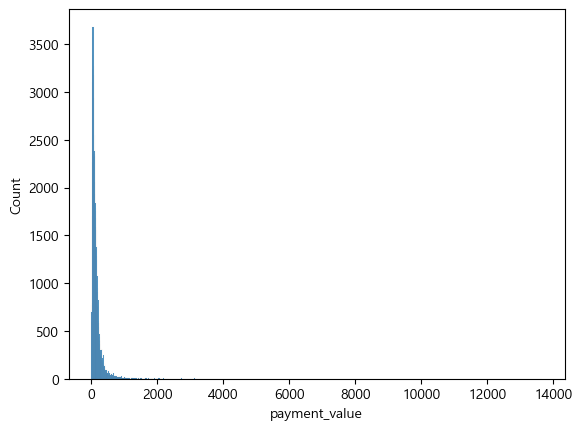

In [5]:
sns.histplot(order_payments['payment_value'])

### order_reviews

- 결측치 있음 -> review comment에 대한 리뷰

In [6]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


review_score

<AxesSubplot: xlabel='review_score', ylabel='count'>

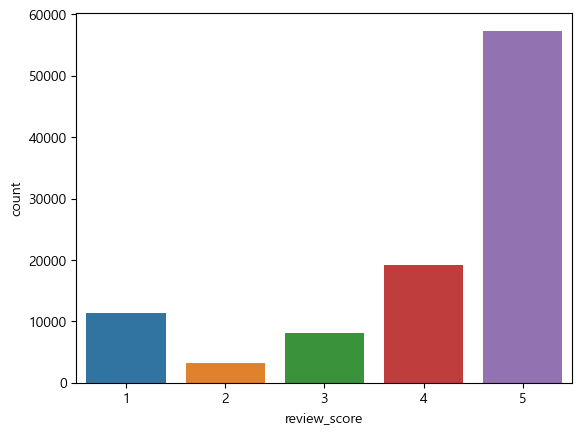

In [13]:
sns.countplot(x=order_reviews.review_score)

review_comment_title, review_comment_message

In [17]:
# comment_title NaN인 경우 87656개 / review_comment_message NaN인 경우 58247
print(order_reviews.review_comment_title.isna().sum())
print(order_reviews.review_comment_message.isna().sum())

87656
58247


언어 번역 Library 'Googletrans'사용

In [ ]:
!pip install googletrans==4.0.0-rc1

In [7]:
# example
from googletrans import Translator
translator = Translator() # 객체 선언

# src 입력어 / dest 원하는 출력언어 [pt : portuguese(포르투갈어)]
print(translator.translate('안녕하세요', src = 'ko', dest='en').text)

hello


project data review message에 적용해보기

In [44]:
comment_df = order_reviews[order_reviews.review_comment_message.notna()]['review_comment_message'].to_frame()
comment_df = comment_df.reset_index(names='real_index')
comment_df

,real_index,review_comment_message
0,3,Recebi bem antes do prazo estipulado.
1,4,Parabéns lojas lannister adorei comprar pela I...
2,9,aparelho eficiente. no site a marca do aparelh...
3,12,"Mas um pouco ,travando...pelo valor ta Boa.\r\n"
4,15,"Vendedor confiável, produto ok e entrega antes..."
...,...,...
40972,99205,para este produto recebi de acordo com a compr...
40973,99208,Entregou dentro do prazo. O produto chegou em ...
40974,99215,"O produto não foi enviado com NF, não existe v..."
40975,99221,"Excelente mochila, entrega super rápida. Super..."


In [45]:
# comment_df['total'] = comment_df[['index', 'review_comment_message']].apply(lambda row: ':'.join(row.values.astype(str), axis = 1))
comment_df['real_index'] = comment_df['real_index'].astype(str) 
comment_df['total'] = comment_df['real_index'] + ' : ' +  comment_df['review_comment_message']
comment_lst = comment_df['total'].to_list()
print(len(comment_lst))

comment_lst_test = comment_lst[:10] # 10개만 test
comment_lst_test

40977

In [46]:
# 10개만 test

trans_comment_lst = []

for i in comment_lst_test :
    trans_comment_lst.append(translator.translate(str(i), src = 'pt', dest='en').text) # english로 출력

print(len(trans_comment_lst), trans_comment_lst[:5])

# 잘 나오는 것을 확인! -> 추후에 활용할 예정

10 ['3: I received well before the deadline.', '4: Congratulations Lannister Lojas I loved buying the internet safe and practical congratulations to all happy Easter', '9: Efficient apparatus.On the site the brand of the device is printed as 3Desinfector and when it arrives with another name ... Update with the correct brand since it is the same device', '12: But a little, crashing ... for the value is good.', '15: Reliable seller, product OK and delivery before the deadline.']


review_creation_date

In [48]:
order_reviews.review_creation_date

0        2018-01-18 00:00:00
1        2018-03-10 00:00:00
2        2018-02-17 00:00:00
3        2017-04-21 00:00:00
4        2018-03-01 00:00:00
                ...         
99219    2018-07-07 00:00:00
99220    2017-12-09 00:00:00
99221    2018-03-22 00:00:00
99222    2018-07-01 00:00:00
99223    2017-07-03 00:00:00
Name: review_creation_date, Length: 99224, dtype: object

review_answer_timestamp

In [50]:
order_reviews.review_answer_timestamp

0        2018-01-18 21:46:59
1        2018-03-11 03:05:13
2        2018-02-18 14:36:24
3        2017-04-21 22:02:06
4        2018-03-02 10:26:53
                ...         
99219    2018-07-14 17:18:30
99220    2017-12-11 20:06:42
99221    2018-03-23 09:10:43
99222    2018-07-02 12:59:13
99223    2017-07-03 21:01:49
Name: review_answer_timestamp, Length: 99224, dtype: object

### orders

- 결측치 있음 -> 결제 승인 시간, 주문 처리 시간, 실제 배송 날짜 column 

In [51]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


order_status

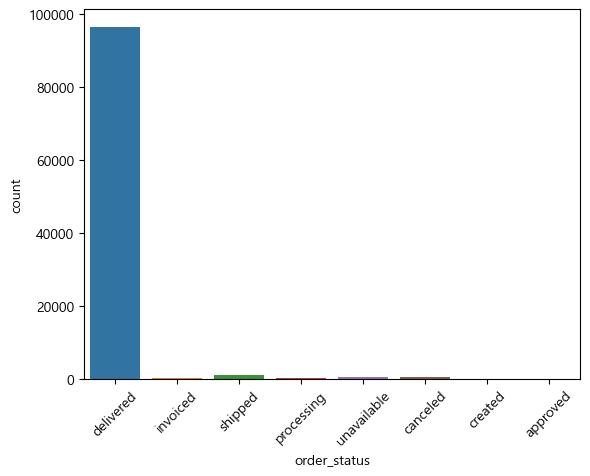

In [55]:
sns.countplot(x=orders.order_status)
plt.xticks(rotation = 45)
plt.show()

order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

![title](orders_date_columns.PNG)

### products
- 결측치 있음 -> category 이름, 설명 관련, 제품 게시 사진 수

In [5]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


product_category_name, product_name_lenght, product_description_lenght

Text(0.5, 1.0, 'product_category_name TOP10')

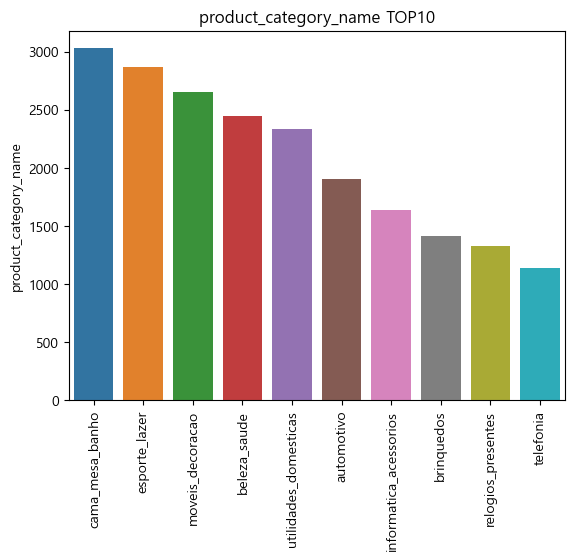

In [11]:
products.product_category_name.value_counts()[:10].to_frame()

sns.barplot(data=products.product_category_name.value_counts()[:10].to_frame(), 
            x=products.product_category_name.value_counts()[:10].to_frame().index, y='product_category_name')
plt.xticks(rotation = 90)
plt.title('product_category_name TOP10')

<AxesSubplot: xlabel='product_name_lenght', ylabel='Count'>

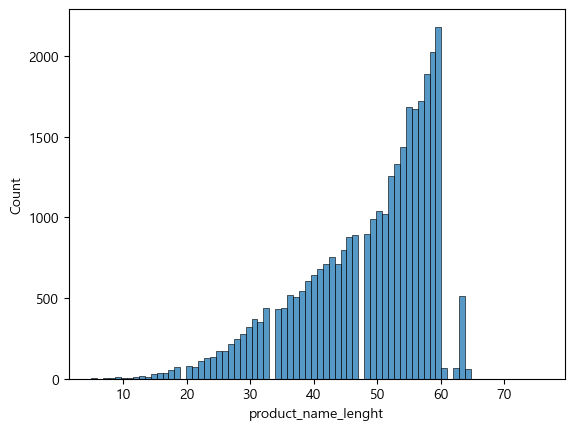

In [14]:
sns.histplot(products.product_name_lenght)

<AxesSubplot: xlabel='product_description_lenght', ylabel='Count'>

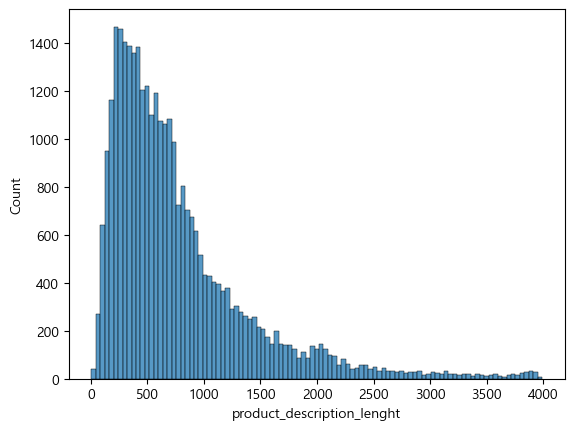

In [13]:
sns.histplot(products.product_description_lenght)

product_photos_qty

<AxesSubplot: xlabel='product_photos_qty', ylabel='Count'>

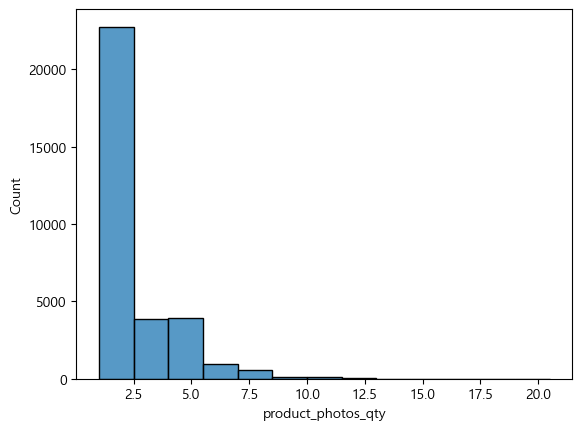

In [17]:
sns.histplot(products.product_photos_qty, binwidth = 1.5)

### sellers

- 결측치 X

In [21]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


seller_zip_code_prefix

In [22]:
# zip_code : 우편번호

sellers.seller_zip_code_prefix = sellers.seller_zip_code_prefix.astype(str)
cond1 = sellers.seller_zip_code_prefix.apply(len)
cond1[cond1.values < 5].shape[0]
cond1[cond1.values < 5].value_counts()

# 앞의 5숫자를 가져온 것인데 5글자 미만인 경우가 1027, 모두 4글자임 -> 마지막 숫자가 0인 경우로 판단 
# 4글자 -> 5글자로 데이터 전처리 필요!

4    1027
Name: seller_zip_code_prefix, dtype: int64

seller_city, seller_state

Text(0.5, 1.0, 'seller_city TOP10')

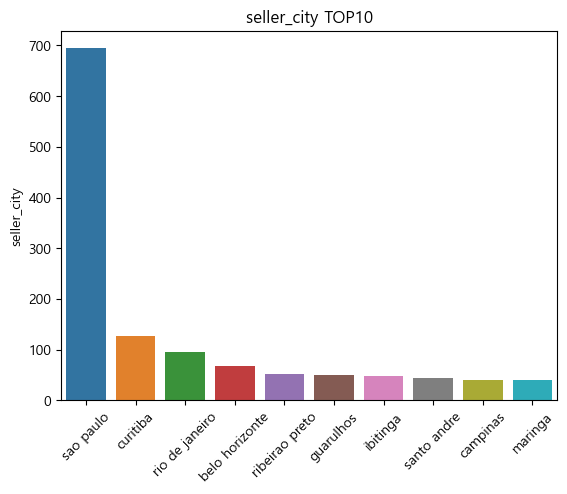

In [24]:
sellers.seller_city.value_counts()[:10].to_frame()
sns.barplot(data=sellers.seller_city.value_counts()[:10].to_frame(), x=sellers.seller_city.value_counts()[:10].to_frame().index, y='seller_city')
plt.xticks(rotation = 45)
plt.title('seller_city TOP10')

Text(0.5, 1.0, 'seller_state TOP10')

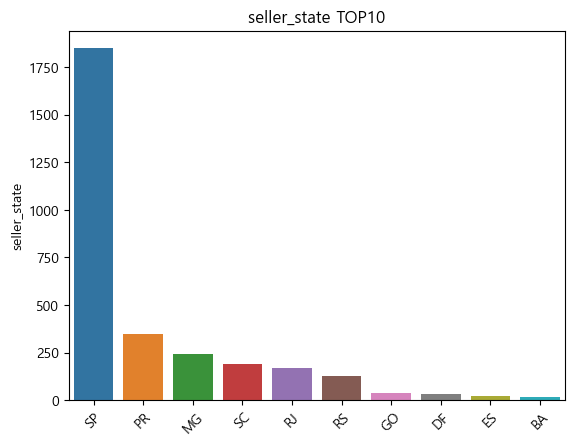

In [25]:
sellers.seller_state.value_counts()[:10].to_frame()
sns.barplot(data=sellers.seller_state.value_counts()[:10].to_frame(), x=sellers.seller_state.value_counts()[:10].to_frame().index, y='seller_state')
plt.xticks(rotation = 45)
plt.title('seller_state TOP10')

### Product_category_name_translation

In [26]:
name_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes
